In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io 
import os
from skimage.feature import hog
from skimage.transform import rescale,resize,rotate

In [3]:
class Transformer():
    def __init__(self,dirs:list,shape:tuple):
        self.from_path='data_leaf'
        self.dirs=dirs
        self.shape=shape
        self.resized_images=[]
        self.y_labels=[]
        self.labels={self.dirs[index]:index for index in range(len(self.dirs))}
        self.images=[f'{self.from_path}\\{d}\\{img}'for d in self.dirs
                     for img in os.listdir(f'{self.from_path}\\{d}')]

    def transform(self):
        for scaler in [1/2,1/3]:
            for img in self.images:
                images=io.imread(img,as_gray=True)
                scaled=rescale(images,scaler)
                resized_img=resize(scaled,self.shape)
                tr_image=hog(resized_img)
                label=img.split('\\')[1]
                self.resized_images.append(tr_image)
                self.y_labels.append(self.labels[label])
                
            return self.resized_images, self.y_labels        



In [5]:
t=Transformer(['Bacterial leaf blight','Brown spot','Leaf smut'],shape=(228,228))
x,y=t.transform()

In [6]:
x[0].shape,len(x)

((54756,), 120)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [8]:
xtrain=np.array([image for image in x_train])
ytrain=np.array(y_train)
xtrain[0]

array([0.22205336, 0.04889327, 0.        , ..., 0.00328652, 0.00320995,
       0.01551261])

In [9]:
xtest=np.array([image for image in x_test])
ytest=np.array(y_test)

In [10]:
from sklearn.neural_network import MLPClassifier

nn=MLPClassifier(hidden_layer_sizes=(784,228),activation='relu',verbose=2)
nn.fit(xtrain,ytrain)

Iteration 1, loss = 1.10893845
Iteration 2, loss = 6.06298072
Iteration 3, loss = 6.33079284
Iteration 4, loss = 10.11147929
Iteration 5, loss = 3.87564969
Iteration 6, loss = 2.11610593
Iteration 7, loss = 1.57312613
Iteration 8, loss = 2.05875113
Iteration 9, loss = 1.28804484
Iteration 10, loss = 0.41289768
Iteration 11, loss = 1.20871700
Iteration 12, loss = 0.93607560
Iteration 13, loss = 0.50122647
Iteration 14, loss = 0.38705397
Iteration 15, loss = 0.38242810
Iteration 16, loss = 0.49729144
Iteration 17, loss = 0.40119913
Iteration 18, loss = 0.14108210
Iteration 19, loss = 0.06462858
Iteration 20, loss = 0.09246596
Iteration 21, loss = 0.14698053
Iteration 22, loss = 0.13992131
Iteration 23, loss = 0.09033195
Iteration 24, loss = 0.03896440
Iteration 25, loss = 0.01779438
Iteration 26, loss = 0.02032226
Iteration 27, loss = 0.03074530
Iteration 28, loss = 0.02556515
Iteration 29, loss = 0.02339378
Iteration 30, loss = 0.02658873
Iteration 31, loss = 0.02053919
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(784, 228), verbose=2)

In [11]:
ypred=nn.predict(xtest)
ytest==ypred

array([False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True])

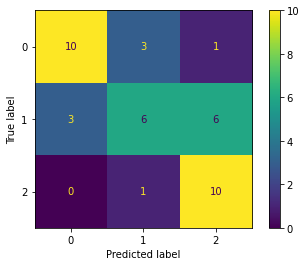

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nn,xtest,ytest)

In [13]:
from sklearn.metrics import f1_score,accuracy_score

f1_score(ytest,ypred,average='weighted')

0.6356878306878306

In [14]:
accuracy_score(ytest,ypred)

0.65

In [17]:
from joblib import dump
dump(nn,'NN1')

['NN1']

In [20]:
x=np.array([image for image in x])
y=np.array(y)

In [22]:
x[0],y

(array([0.119536  , 0.06904979, 0.07501431, ..., 0.09565988, 0.11723656,
        0.08156743]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [23]:
nn2=MLPClassifier(hidden_layer_sizes=(784,228),activation='relu',verbose=2)
nn2.fit(x,y.ravel())

Iteration 1, loss = 1.10485935
Iteration 2, loss = 5.81534121
Iteration 3, loss = 7.33548907
Iteration 4, loss = 3.62703173
Iteration 5, loss = 0.96197517
Iteration 6, loss = 2.54690553
Iteration 7, loss = 1.15685659
Iteration 8, loss = 1.46317191
Iteration 9, loss = 0.52466390
Iteration 10, loss = 0.65746502
Iteration 11, loss = 0.42999722
Iteration 12, loss = 0.48328851
Iteration 13, loss = 0.27607337
Iteration 14, loss = 0.25143612
Iteration 15, loss = 0.32562350
Iteration 16, loss = 0.07667257
Iteration 17, loss = 0.05592657
Iteration 18, loss = 0.12458274
Iteration 19, loss = 0.14648290
Iteration 20, loss = 0.07055032
Iteration 21, loss = 0.03297059
Iteration 22, loss = 0.03760816
Iteration 23, loss = 0.04496482
Iteration 24, loss = 0.04743261
Iteration 25, loss = 0.03559617
Iteration 26, loss = 0.01788253
Iteration 27, loss = 0.00935654
Iteration 28, loss = 0.00837547
Iteration 29, loss = 0.01049456
Iteration 30, loss = 0.01238665
Iteration 31, loss = 0.01096717
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(784, 228), verbose=2)

In [24]:
nn2.predict(xtest)==ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [25]:
from joblib import dump
dump(nn2,'NN2')

['NN2']

In [26]:
nn2.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (784, 228),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 2,
 'warm_start': False}